In [10]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

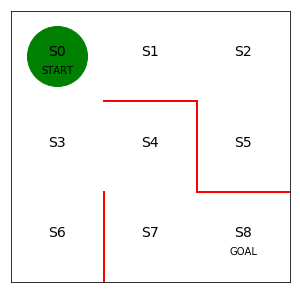

In [11]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [13]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [14]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [15]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [16]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [17]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [18]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 0], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は28です


In [19]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [20]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49910714 0.50089286 0.        ]
 [0.         0.49910714 0.         0.50089286]
 [0.         0.         0.49910714 0.50089286]
 [0.33452452 0.33333192 0.33214357 0.        ]
 [0.         0.         0.50089286 0.49910714]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [11]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.008227245122111315
迷路を解くのにかかったステップ数は104です
0.011515257208134622
迷路を解くのにかかったステップ数は82です
0.00866873505122967
迷路を解くのにかかったステップ数は152です
0.015662856740735975
迷路を解くのにかかったステップ数は20です
0.03242128450889248
迷路を解くのにかかったステップ数は6です
0.013457189769765787
迷路を解くのにかかったステップ数は48です
0.00810540174185348
迷路を解くのにかかったステップ数は68です
0.03169255087849915
迷路を解くのにかかったステップ数は10です
0.010756649374463245
迷路を解くのにかかったステップ数は108です
0.04830025886889211
迷路を解くのにかかったステップ数は4です
0.0077281244399038385
迷路を解くのにかかったステップ数は56です
0.0073908932108745495
迷路を解くのにかかったステップ数は42です
0.01877065677724321
迷路を解くのにかかったステップ数は26です
0.009624523625091641
迷路を解くのにかかったステップ数は64です
0.009051401651276325
迷路を解くのにかかったステップ数は38です
0.007425050813204825
迷路を解くのにかかったステップ数は34です
0.015360452354734933
迷路を解くのにかかったステップ数は24です
0.007635261370631308
迷路を解くのにかかったステップ数は78です
0.007798382993488451
迷路を解くのにかかったステップ数は50です
0.01013114434036777
迷路を解くのにかかったステップ数は38です
0.010260676888502684
迷路を解くのにかかったステップ数は34です
0.012753663889484068
迷路を解くのにかかったステップ数は64です
0.011101440383005035
迷路を解くのにかかったステップ数は42です
0.0125329467966

0.01112789629249103
迷路を解くのにかかったステップ数は72です
0.017291417364999062
迷路を解くのにかかったステップ数は14です
0.016097184234045325
迷路を解くのにかかったステップ数は26です
0.020481047571676986
迷路を解くのにかかったステップ数は16です
0.029396384891038796
迷路を解くのにかかったステップ数は4です
0.022524546538216506
迷路を解くのにかかったステップ数は6です
0.0178476676488086
迷路を解くのにかかったステップ数は6です
0.017126763322751787
迷路を解くのにかかったステップ数は16です
0.016194122869372746
迷路を解くのにかかったステップ数は44です
0.018823890389432912
迷路を解くのにかかったステップ数は8です
0.013027169640433156
迷路を解くのにかかったステップ数は10です
0.013532890076457305
迷路を解くのにかかったステップ数は20です
0.023566612974907253
迷路を解くのにかかったステップ数は6です
0.021089557873657627
迷路を解くのにかかったステップ数は12です
0.01567112545067406
迷路を解くのにかかったステップ数は84です
0.02166305014097558
迷路を解くのにかかったステップ数は10です
0.01741523624616481
迷路を解くのにかかったステップ数は6です
0.028174124591198613
迷路を解くのにかかったステップ数は4です
0.023076592376185423
迷路を解くのにかかったステップ数は6です
0.017257482601645863
迷路を解くのにかかったステップ数は10です
0.027505126941832908
迷路を解くのにかかったステップ数は6です
0.013552843048481394
迷路を解くのにかかったステップ数は48です
0.016307960930342785
迷路を解くのにかかったステップ数は16です
0.016923752904015044
迷路を解く

0.011773682654310308
迷路を解くのにかかったステップ数は6です
0.015300071035325435
迷路を解くのにかかったステップ数は4です
0.015969946771423632
迷路を解くのにかかったステップ数は10です
0.015171748947477026
迷路を解くのにかかったステップ数は4です
0.020302811210263616
迷路を解くのにかかったステップ数は8です
0.01501491424548361
迷路を解くのにかかったステップ数は4です
0.01607698654878248
迷路を解くのにかかったステップ数は16です
0.011623843311326765
迷路を解くのにかかったステップ数は6です
0.016897289158683257
迷路を解くのにかかったステップ数は20です
0.010322862763982782
迷路を解くのにかかったステップ数は8です
0.011545703202018726
迷路を解くのにかかったステップ数は6です
0.011488115497252843
迷路を解くのにかかったステップ数は6です
0.014776991712405235
迷路を解くのにかかったステップ数は8です
0.014921687650506832
迷路を解くのにかかったステップ数は4です
0.012662350025295366
迷路を解くのにかかったステップ数は14です
0.014851982537649216
迷路を解くのにかかったステップ数は4です
0.01578147039428543
迷路を解くのにかかったステップ数は6です
0.01820901937345637
迷路を解くのにかかったステップ数は10です
0.012616162363389166
迷路を解くのにかかったステップ数は42です
0.015749592072484553
迷路を解くのにかかったステップ数は6です
0.017160104547023852
迷路を解くのにかかったステップ数は12です
0.016906792314002966
迷路を解くのにかかったステップ数は8です
0.014989554935013874
迷路を解くのにかかったステップ数は4です
0.01149162270487493
迷路を解くのにかかった

0.008878702158308063
迷路を解くのにかかったステップ数は4です
0.01278136912617045
迷路を解くのにかかったステップ数は10です
0.008851407121558408
迷路を解くのにかかったステップ数は4です
0.008749065854389684
迷路を解くのにかかったステップ数は4です
0.015621013969536052
迷路を解くのにかかったステップ数は12です
0.012219715287398278
迷路を解くのにかかったステップ数は8です
0.023489130938219083
迷路を解くのにかかったステップ数は10です
0.010437770454457068
迷路を解くのにかかったステップ数は10です
0.008843544632117131
迷路を解くのにかかったステップ数は4です
0.01179448398222653
迷路を解くのにかかったステップ数は12です
0.008839359203822977
迷路を解くのにかかったステップ数は4です
0.009092011210795517
迷路を解くのにかかったステップ数は6です
0.011653232052637907
迷路を解くのにかかったステップ数は10です
0.015961620280320568
迷路を解くのにかかったステップ数は6です
0.008854570652720162
迷路を解くのにかかったステップ数は4です
0.008752111295256201
迷路を解くのにかかったステップ数は4です
0.00865125253149819
迷路を解くのにかかったステップ数は4です
0.008551964698636727
迷路を解くのにかかったステップ数は4です
0.011373143569348862
迷路を解くのにかかったステップ数は6です
0.008457411491713251
迷路を解くのにかかったステップ数は4です
0.00836111337254529
迷路を解くのにかかったステップ数は4です
0.00826630293275879
迷路を解くのにかかったステップ数は4です
0.008172952698048422
迷路を解くのにかかったステップ数は4です
0.009129053733219775
迷路を解くのにかかったス

0.012071453874788196
迷路を解くのにかかったステップ数は8です
0.004346736151883385
迷路を解くのにかかったステップ数は4です
0.004308483003995764
迷路を解くのにかかったステップ数は4です
0.0042707046568718765
迷路を解くのにかかったステップ数は4です
0.004233393744416586
迷路を解くのにかかったステップ数は4です
0.004196543032788921
迷路を解くのにかかったステップ数は4です
0.007389411295654874
迷路を解くのにかかったステップ数は6です
0.00648172058021855
迷路を解くのにかかったステップ数は6です
0.004193669490390836
迷路を解くのにかかったステップ数は4です
0.006476327034096924
迷路を解くのにかかったステップ数は6です
0.004178864153982012
迷路を解くのにかかったステップ数は4です
0.0041426646904391545
迷路を解くのにかかったステップ数は4です
0.004106908140011523
迷路を解くのにかかったステップ数は4です
0.011202388005117442
迷路を解くのにかかったステップ数は12です
0.006493250330600775
迷路を解くのにかかったステップ数は6です
0.004164143402765899
迷路を解くのにかかったステップ数は4です
0.006489347218956623
迷路を解くのにかかったステップ数は6です
0.00734037428397942
迷路を解くのにかかったステップ数は6です
0.008033193983080666
迷路を解くのにかかったステップ数は6です
0.0041684137297589435
迷路を解くのにかかったステップ数は4です
0.004132358121868893
迷路を解くのにかかったステップ数は4です
0.006482108494801395
迷路を解くのにかかったステップ数は6です
0.004120859101248306
迷路を解くのにかかったステップ数は4です
0.004085350262486978
迷路を解くのにかかった

迷路を解くのにかかったステップ数は20です
0.010035415683524208
迷路を解くのにかかったステップ数は6です
0.002772912411226576
迷路を解くのにかかったステップ数は4です
0.0027525098597353317
迷路を解くのにかかったステップ数は4です
0.002732324292581946
迷路を解くのにかかったステップ数は4です
0.002712352746012288
迷路を解くのにかかったステップ数は4です
0.006553048426254836
迷路を解くのにかかったステップ数は6です
0.00916406718361052
迷路を解くのにかかったステップ数は10です
0.008070008976141324
迷路を解くのにかかったステップ数は8です
0.0028100745281809947
迷路を解くのにかかったステップ数は4です
0.005601196726255059
迷路を解くのにかかったステップ数は6です
0.008075811531507257
迷路を解くのにかかったステップ数は8です
0.00966417926508567
迷路を解くのにかかったステップ数は8です
0.0029109833265915652
迷路を解くのにかかったステップ数は4です
0.002888904898227386
迷路を解くのにかかったステップ数は4です
0.0056861322505305165
迷路を解くのにかかったステップ数は6です
0.002897693856148055
迷路を解くのにかかったステップ数は4です
0.002875728412012807
迷路を解くのにかかったステップ数は4です
0.002854004054355326
迷路を解くのにかかったステップ数は4です
0.0028325173858291808
迷路を解くのにかかったステップ数は4です
0.0028112650663657188
迷路を解くのにかかったステップ数は4です
0.002790243812075245
迷路を解くのにかかったステップ数は4です
0.0027694503941725
迷路を解くのにかかったステップ数は4です
0.009902137311277634
迷路を解くのにかかったステップ数は6です
0.0096147

0.0020672817765533397
迷路を解くのにかかったステップ数は4です
0.005446603969866862
迷路を解くのにかかったステップ数は6です
0.002069950897217211
迷路を解くのにかかったステップ数は4です
0.005492660531771228
迷路を解くのにかかったステップ数は6です
0.005000907048949933
迷路を解くのにかかったステップ数は6です
0.005553231067626785
迷路を解くのにかかったステップ数は6です
0.0021022201983836655
迷路を解くのにかかったステップ数は4です
0.0020887517822725035
迷路を解くのにかかったステップ数は4です
0.0020754086019418166
迷路を解くのにかかったステップ数は4です
0.00701960712115364
迷路を解くのにかかったステップ数は10です
0.005560547786264566
迷路を解くのにかかったステップ数は6です
0.0020896427982967994
迷路を解くのにかかったステップ数は4です
0.0020762757950758687
迷路を解くのにかかったステップ数は4です
0.0020630330262176796
迷路を解くのにかかったステップ数は4です
0.002049912994067163
迷路を解くのにかかったステップ数は4です
0.002036914222960297
迷路を解くのにかかったステップ数は4です
0.0020240352588453067
迷路を解くのにかかったステップ数は4です
0.005508386393617927
迷路を解くのにかかったステップ数は6です
0.0020308833884967945
迷路を解くのにかかったステップ数は4です
0.002018032694265516
迷路を解くのにかかったステップ数は4です
0.002005300382819611
迷路を解くのにかかったステップ数は4です
0.0019926850367279828
迷路を解くのにかかったステップ数は4です
0.0019801852592750413
迷路を解くのにかかったステップ数は4です
0.008964857792791762
迷路

0.0012172010555668925
迷路を解くのにかかったステップ数は4です
0.0012111376605131244
迷路を解くのにかかったステップ数は4です
0.003658635337618253
迷路を解くのにかかったステップ数は6です
0.0012194191020680756
迷路を解くのにかかったステップ数は4です
0.0012133320556750732
迷路を解くのにかかったステップ数は4です
0.0012072895303866515
迷路を解くのにかかったステップ数は4です
0.0012012911007495616
迷路を解くのにかかったステップ数は4です
0.003801202374661257
迷路を解くのにかかったステップ数は6です
0.003867757841995313
迷路を解くのにかかったステップ数は6です
0.0012171956066201195
迷路を解くのにかかったステップ数は4です
0.0012111263945575115
迷路を解くのにかかったステップ数は4です
0.0012051015221448483
迷路を解くのにかかったステップ数は4です
0.003658275206721087
迷路を解くのにかかったステップ数は6です
0.0012134118648779724
迷路を解くのにかかったステップ数は4です
0.003702926482570937
迷路を解くのにかかったステップ数は6です
0.0047001197388031185
迷路を解くのにかかったステップ数は8です
0.001244155759279636
迷路を解くのにかかったステップ数は4です
0.0012378667484508402
迷路を解くのにかかったステップ数は4です
0.0012316243666340432
迷路を解くのにかかったステップ数は4です
0.003891118887134122
迷路を解くのにかかったステップ数は6です
0.001236790321298753
迷路を解くのにかかったステップ数は4です
0.0012305562618743007
迷路を解くのにかかったステップ数は4です
0.0012243682961469646
迷路を解くのにかかったステップ数は4です
0.00121822597849767

0.0008384240129895998
迷路を解くのにかかったステップ数は4です
0.0008349098028294297
迷路を解くのにかかったステップ数は4です
0.0008314173021890907
迷路を解くのにかかったステップ数は4です
0.0008279463348311901
迷路を解くのにかかったステップ数は4です
0.0008244967262833157
迷路を解くのにかかったステップ数は4です
0.0008210683038185132
迷路を解くのにかかったステップ数は4です
0.0008176608964318641
迷路を解くのにかかったステップ数は4です
0.0008142743348223923
迷路を解くのにかかったステップ数は4です
0.0008109084513727646
迷路を解くのにかかったステップ数は4です
0.0008075630801271175
迷路を解くのにかかったステップ数は4です
0.0008042380567755518
迷路を解くのにかかったステップ数は4です
0.000800933218630541
迷路を解くのにかかったステップ数は4です
0.0007976484046105375
迷路を解くのにかかったステップ数は4です
0.0007943834552215125
迷路を解くのにかかったステップ数は4です
0.0007911382125356421
迷路を解くのにかかったステップ数は4です
0.0007879125201773023
迷路を解くのにかかったステップ数は4です
0.0007847062232986431
迷路を解くのにかかったステップ数は4です
0.0007815191685704714
迷路を解くのにかかったステップ数は4です
0.0007783512041565285
迷路を解くのにかかったステップ数は4です
0.0007752021797006181
迷路を解くのにかかったステップ数は4です
0.003237990869923473
迷路を解くのにかかったステップ数は6です
0.0007813023806891792
迷路を解くのにかかったステップ数は4です
0.0007781314684761932
迷路を解くのにかかったステップ数は4です
0.00077497955

0.0006672051908667917
迷路を解くのにかかったステップ数は4です
0.0006646949550428161
迷路を解くのにかかったステップ数は4です
0.0006621986852151686
迷路を解くのにかかったステップ数は4です
0.0006597162789178136
迷路を解くのにかかったステップ数は4です
0.0006572476346131499
迷路を解くのにかかったステップ数は4です
0.0006547926516862479
迷路を解くのにかかったステップ数は4です
0.0006523512304326684
迷路を解くのにかかったステップ数は4です
0.0027377445728888304
迷路を解くのにかかったステップ数は6です
0.0006563757369063387
迷路を解くのにかかったステップ数は4です
0.0006539272852071239
迷路を解くのにかかったステップ数は4です
0.0006514923349296604
迷路を解くのにかかったステップ数は4です
0.0006490707879320198
迷路を解くのにかかったステップ数は4です
0.0006466625469526144
迷路を解くのにかかったステップ数は4です
0.0006442675156066238
迷路を解くのにかかったステップ数は4です
0.002979379326689912
迷路を解くのにかかったステップ数は6です
0.000650589752446265
迷路を解くのにかかったステップ数は4です
0.0006481676699398205
迷路を解くのにかかったステップ数は4です
0.0006457589389938338
迷路を解くのにかかったステップ数は4です
0.0006433634624253386
迷路を解くのにかかったステップ数は4です
0.0006409811439273931
迷路を解くのにかかったステップ数は4です
0.0006386118880612711
迷路を解くのにかかったステップ数は4です
0.0006362556002464971
迷路を解くのにかかったステップ数は4です
0.0006339121867531793
迷路を解くのにかかったステップ数は4です
0.00063158155

0.00046666436380058546
迷路を解くのにかかったステップ数は4です
0.0004651835625105495
迷路を解くのにかかったステップ数は4です
0.0036943235903351967
迷路を解くのにかかったステップ数は8です
0.0004745356389558933
迷路を解くのにかかったステップ数は4です
0.0004730121971348797
迷路を解くのにかかったステップ数は4です
0.00047149602778741306
迷路を解くのにかかったステップ数は4です
0.00046998708490421023
迷路を解くのにかかったステップ数は4です
0.0004684853228380803
迷路を解くのにかかったステップ数は4です
0.00046699069630184997
迷路を解くのにかかったステップ数は4です
0.0004655031603630344
迷路を解くのにかかったステップ数は4です
0.0004640226704408258
迷路を解くのにかかったステップ数は4です
0.0004625491823035295
迷路を解くのにかかったステップ数は4です
0.0004610826520658022
迷路を解くのにかかったステップ数は4です
0.0004596230361821087
迷路を解くのにかかったステップ数は4です
0.00045817029144916074
迷路を解くのにかかったステップ数は4です
0.00045672437499779187
迷路を解くのにかかったステップ数は4です
0.00045528524429096565
迷路を解くのにかかったステップ数は4です
0.00045385285712379667
迷路を解くのにかかったステップ数は4です
0.00045242717161497054
迷路を解くのにかかったステップ数は4です
0.0004510081462096721
迷路を解くのにかかったステップ数は4です
0.00044959573967170985
迷路を解くのにかかったステップ数は4です
0.0004481899110841091
迷路を解くのにかかったステップ数は4です
0.00044679061984298496
迷路を解くのにかかったステップ数は4です


0.00035858196606601556
迷路を解くのにかかったステップ数は4です
0.00035756848531873914
迷路を解くのにかかったステップ数は4です
0.00035655929451796145
迷路を解くのにかかったステップ数は4です
0.00035555436943313784
迷路を解くのにかかったステップ数は4です
0.0003545536860044621
迷路を解くのにかかったステップ数は4です
0.0003535572203419157
迷路を解くのにかかったステップ数は4です
0.0003525649487258545
迷路を解くのにかかったステップ数は4です
0.0003515768475996009
迷路を解くのにかかったステップ数は4です
0.00035059289357827067
迷路を解くのにかかったステップ数は4です
0.005278476925742327
迷路を解くのにかかったステップ数は6です
0.00035289031518017863
迷路を解くのにかかったステップ数は4です
0.00035190306431085935
迷路を解くのにかかったステップ数は4です
0.0003509199444933324
迷路を解くのにかかったステップ数は4です
0.0003499409326858001
迷路を解くのにかかったステップ数は4です
0.0003489660060098723
迷路を解くのにかかったステップ数は4です
0.00034799514174513324
迷路を解くのにかかったステップ数は4です
0.0003470283173290338
迷路を解くのにかかったステップ数は4です
0.00034606551035818583
迷路を解くのにかかったステップ数は4です
0.0003451066985817458
迷路を解くのにかかったステップ数は4です
0.0003441518599038365
迷路を解くのにかかったステップ数は4です
0.0019276533032573512
迷路を解くのにかかったステップ数は6です
0.00034684511178026053
迷路を解くのにかかったステップ数は4です
0.005260813440417723
迷路を解くのにかかったステップ数は6です
0.0

0.000274344845401989
迷路を解くのにかかったステップ数は4です
0.0002736579418281121
迷路を解くのにかかったステップ数は4です
0.00027297363529239435
迷路を解くのにかかったステップ数は4です
0.00027229191258601286
迷路を解くのにかかったステップ数は4です
0.0002716127605837653
迷路を解くのにかかったステップ数は4です
0.00027093616624545604
迷路を解くのにかかったステップ数は4です
0.00027026211661390805
迷路を解くのにかかったステップ数は4です
0.0002695905988145137
迷路を解くのにかかったステップ数は4です
0.00026892160005542905
迷路を解くのにかかったステップ数は4です
0.0020552738435876596
迷路を解くのにかかったステップ数は6です
0.00027351666610991865
迷路を解くのにかかったステップ数は4です
0.0017242995191726757
迷路を解くのにかかったステップ数は6です
0.0002758379481786876
迷路を解くのにかかったステップ数は4です
0.0002751427909980283
迷路を解くのにかかったステップ数は4です
0.0002744502855766655
迷路を解くのにかかったステップ数は4です
0.00027376041827604884
迷路を解くのにかかったステップ数は4です
0.00027307317554982335
迷路を解くのにかかったステップ数は4です
0.0015355077377668443
迷路を解くのにかかったステップ数は6です
0.00027509743304484843
迷路を解くのにかかったステップ数は4です
0.00027440684308569635
迷路を解くのにかかったステップ数は4です
0.0002737188728842103
迷路を解くのにかかったステップ数は4です
0.00027303350906289145
迷路を解くのにかかったステップ数は4です
0.00027235073832991737
迷路を解くのにかかったステップ数は4です


0.00023772983792285513
迷路を解くのにかかったステップ数は4です
0.00023717955506837723
迷路を解くのにかかったステップ数は4です
0.00023663118242637018
迷路を解くのにかかったステップ数は4です
0.0002360847111460753
迷路を解くのにかかったステップ数は4です
0.0017892520697262281
迷路を解くのにかかったステップ数は6です
0.00023940970788597152
迷路を解くのにかかったステップ数は4です
0.00023885214128426674
迷路を解くのにかかったステップ数は4です
0.00023829652517892708
迷路を解くのにかかったステップ数は4です
0.0002377428504482127
迷路を解くのにかかったステップ数は4です
0.00023719110802470147
迷路を解くのにかかったステップ数は4です
0.00023664128889355415
迷路を解くのにかかったステップ数は4です
0.00023609338409263936
迷路を解くのにかかったステップ数は4です
0.0002355473847126914
迷路を解くのにかかったステップ数は4です
0.00023500328189592946
迷路を解くのにかかったステップ数は4です
0.0002344610668360246
迷路を解くのにかかったステップ数は4です
0.00023392073077815184
迷路を解くのにかかったステップ数は4です
0.00023338226501900053
迷路を解くのにかかったステップ数は4です
0.0002328456609049425
迷路を解くのにかかったステップ数は4です
0.00023231090983209454
迷路を解くのにかかったステップ数は4です
0.00023177800324810163
迷路を解くのにかかったステップ数は4です
0.00023124693264919317
迷路を解くのにかかったステップ数は4です
0.00023071768957918896
迷路を解くのにかかったステップ数は4です
0.00023019026563357928
迷路を解くのにかかったステップ

0.0002023390882314735
迷路を解くのにかかったステップ数は4です
0.00020190647851628211
迷路を解くのにかかったステップ数は4です
0.00020147525648720258
迷路を解くのにかかったステップ数は4です
0.00020104541620053276
迷路を解くのにかかったステップ数は4です
0.00020061695174179023
迷路を解くのにかかったステップ数は4です
0.000200189857231926
迷路を解くのにかかったステップ数は4です
0.00019976412681948705
迷路を解くのにかかったステップ数は4です
0.00019933975468639648
迷路を解くのにかかったステップ数は4です
0.00019891673504700627
迷路を解くのにかかったステップ数は4です
0.00019849506214276655
迷路を解くのにかかったステップ数は4です
0.0001980747302494975
迷路を解くのにかかったステップ数は4です
0.00019765573367116172
迷路を解くのにかかったステップ数は4です
0.00019723806674319493
迷路を解くのにかかったステップ数は4です
0.00019682172383150148
迷路を解くのにかかったステップ数は4です
0.00019640669932953665
迷路を解くのにかかったステップ数は4です
0.00019599298766397044
迷路を解くのにかかったステップ数は4です
0.00019558058328851893
迷路を解くのにかかったステップ数は4です
0.00019516948068617514
迷路を解くのにかかったステップ数は4です
0.00019475967437098535
迷路を解くのにかかったステップ数は4です
0.00019435115888354754
迷路を解くのにかかったステップ数は4です
0.00019394392879605073
迷路を解くのにかかったステップ数は4です
0.0013258123340653977
迷路を解くのにかかったステップ数は6です
0.00019546932397003502
迷路を解くのにかかったステッ

0.0001729092200535732
迷路を解くのにかかったステップ数は4です
0.00017256632259921544
迷路を解くのにかかったステップ数は4です
0.00017222444733130948
迷路を解くのにかかったステップ数は4です
0.00017188359017235137
迷路を解くのにかかったステップ数は4です
0.00017154374706497381
迷路を解くのにかかったステップ数は4です
0.00017120491397139975
迷路を解くのにかかったステップ数は4です
0.00017086708687606873
迷路を解くのにかかったステップ数は4です
0.00017053026178238603
迷路を解くのにかかったステップ数は4です
0.0001701944347130748
迷路を解くのにかかったステップ数は4です
0.00016985960171134878
迷路を解くのにかかったステップ数は4です
0.00016952575884002404
迷路を解くのにかかったステップ数は4です
0.00016919290218213485
迷路を解くのにかかったステップ数は4です
0.00016886102783843747
迷路を解くのにかかったステップ数は4です
0.00016853013193110847
迷路を解くのにかかったステップ数は4です
0.00016820021059986076
迷路を解くのにかかったステップ数は4です
0.00016787126000450403
迷路を解くのにかかったステップ数は4です
0.00016754327632368532
迷路を解くのにかかったステップ数は4です
0.001425229521713249
迷路を解くのにかかったステップ数は6です
0.00016966589288701373
迷路を解くのにかかったステップ数は4です
0.00016933239667001054
迷路を解くのにかかったステップ数は4です
0.00016899988587295092
迷路を解くのにかかったステップ数は4です
0.000168668356600574
迷路を解くのにかかったステップ数は4です
0.00016833780497604
迷路を解くのにかかったステップ数は4

0.0001444621598604423
迷路を解くのにかかったステップ数は4です
0.0001442007890739786
迷路を解くのにかかったステップ数は4です
0.00014394012753219526
迷路を解くのにかかったステップ数は4です
0.00014368017266776917
迷路を解くのにかかったステップ数は4です
0.00014342092192348548
迷路を解くのにかかったステップ数は4です
0.00014316237275326972
迷路を解くのにかかったステップ数は4です
0.0013759330532391069
迷路を解くのにかかったステップ数は6です
0.00014529939808428233
迷路を解くのにかかったステップ数は4です
0.0001450351048194222
迷路を解くのにかかったステップ数は4です
0.00014477153371627617
迷路を解くのにかかったステップ数は4です
0.00014450868213690925
迷路を解くのにかかったステップ数は4です
0.00014424654745568213
迷路を解くのにかかったステップ数は4です
0.00014398512706061128
迷路を解くのにかかったステップ数は4です
0.0001437244183484076
迷路を解くのにかかったステップ数は4です
0.000143464418730338
迷路を解くのにかかったステップ数は4です
0.00014320512562855485
迷路を解くのにかかったステップ数は4です
0.00014294653647647926
迷路を解くのにかかったステップ数は4です
0.000142688648720345
迷路を解くのにかかったステップ数は4です
0.00014243145981682886
迷路を解くのにかかったステップ数は4です
0.00014217496723553484
迷路を解くのにかかったステップ数は4です
0.00014191916845571542
迷路を解くのにかかったステップ数は4です
0.0001416640609695763
迷路を解くのにかかったステップ数は4です
0.00014140964228047913
迷路を解くのにかかったステップ数は4で

0.000135908185151851
迷路を解くのにかかったステップ数は4です
0.00013567041065317906
迷路を解くのにかかったステップ数は4です
0.0001354332587622728
迷路を解くのにかかったステップ数は4です
0.0001351967273073209
迷路を解くのにかかったステップ数は4です
0.00013496081412651788
迷路を解くのにかかったステップ数は4です
0.00013472551706670242
迷路を解くのにかかったステップ数は4です
0.00013449083398521175
迷路を解くのにかかったステップ数は4です
0.00013425676274688922
迷路を解くのにかかったステップ数は4です
0.0013101775208994252
迷路を解くのにかかったステップ数は6です
0.00013616262115540706
迷路を解くのにかかったステップ数は4です
0.0001359237323485512
迷路を解くのにかかったステップ数は4です
0.011196750060555698
迷路を解くのにかかったステップ数は8です
0.00013729098289187204
迷路を解くのにかかったステップ数は4です
0.00013704887126322722
迷路を解くのにかかったステップ数は4です
0.00013680739981384964
迷路を解くのにかかったステップ数は4です
0.00013656656628605914
迷路を解くのにかかったステップ数は4です
0.00013632636843069826
迷路を解くのにかかったステップ数は4です
0.00013608680400888605
迷路を解くのにかかったステップ数は4です
0.0011524311362405837
迷路を解くのにかかったステップ数は6です
0.0001375490895952746
迷路を解くのにかかったステップ数は4です
0.0001373065861236325
迷路を解くのにかかったステップ数は4です
0.00013706472312597327
迷路を解くのにかかったステップ数は4です
0.00013682349834837244
迷路を解くのにかかったステップ数は4です

0.0001223600604936554
迷路を解くのにかかったステップ数は4です
0.0011962818591792976
迷路を解くのにかかったステップ数は6です
0.0010953291116316717
迷路を解くのにかかったステップ数は6です
0.00012532324574662454
迷路を解くのにかかったステップ数は4です
0.00012511357854781517
迷路を解くのにかかったステップ数は4です
0.0001249044349086962
迷路を解くのにかかったステップ数は4です
0.00012469581309332636
迷路を解くのにかかったステップ数は4です
0.0001244877113713086
迷路を解くのにかかったステップ数は4です
0.0001242801280194744
迷路を解くのにかかったステップ数は4です
0.00012407306132270965
迷路を解くのにかかったステップ数は4です
0.00012386650957281475
迷路を解くのにかかったステップ数は4です
0.00012366047106678567
迷路を解くのにかかったステップ数は4です
0.00012345494411221923
迷路を解くのにかかったステップ数は4です
0.00012324992702015224
迷路を解くのにかかったステップ数は4です
0.00012304541811029683
迷路を解くのにかかったステップ数は4です
0.001100731450507736
迷路を解くのにかかったステップ数は6です
0.0001243458659895072
迷路を解くのにかかったステップ数は4です
0.00012413878535170488
迷路を解くのにかかったステップ数は4です
0.0001239322192082542
迷路を解くのにかかったステップ数は4です
0.0001237261658602884
迷路を解くのにかかったステップ数は4です
0.0001235206236180255
迷路を解くのにかかったステップ数は4です
0.0001233155907975278
迷路を解くのにかかったステップ数は4です
0.00012311106572203412
迷路を解くのにかかったステップ数は4です
0

0.0039486207599515495
迷路を解くのにかかったステップ数は6です
0.00012395802416889298
迷路を解くのにかかったステップ数は4です
0.00012375129070429404
迷路を解くのにかかったステップ数は4です
0.00012354507280609196
迷路を解くのにかかったステップ数は4です
0.001106594984319434
迷路を解くのにかかったステップ数は6です
0.00012486307770855076
迷路を解くのにかかったステップ数は4です
0.00012465425634306491
迷路を解くのにかかったステップ数は4です
0.00012444595688050446
迷路を解くのにかかったステップ数は4です
0.00012423817758344495
迷路を解くのにかかったステップ数は4です
0.00012403091672474366
迷路を解くのにかかったステップ数は4です
0.00012382417258313336
迷路を解くのにかかったステップ数は4です
0.00012361794344440714
迷路を解くのにかかったステップ数は4です
0.00012341222760215223
迷路を解くのにかかったステップ数は4です
0.00012320702335653043
迷路を解くのにかかったステップ数は4です
0.00012300232901402489
迷路を解くのにかかったステップ数は4です
0.00012279814288974726
迷路を解くのにかかったステップ数は4です
0.0001225944633047784
迷路を解くのにかかったステップ数は4です
0.00012239128858637302
迷路を解くのにかかったステップ数は4です
0.00012218861707104234
迷路を解くのにかかったステップ数は4です
0.00012198644709881558
迷路を解くのにかかったステップ数は4です
0.00012178477702035582
迷路を解くのにかかったステップ数は4です
0.00012158360518941744
迷路を解くのにかかったステップ数は4です
0.00012138292996907891
迷路を解くのにかかったステ

0.00011985279834014935
迷路を解くのにかかったステップ数は4です
0.00011965440883501821
迷路を解くのにかかったステップ数は4です
0.00011945651362592694
迷路を解くのにかかったステップ数は4です
0.00011925911106283084
迷路を解くのにかかったステップ数は4です
0.00011906219950151217
迷路を解くのにかかったステップ数は4です
0.0001188657773049974
迷路を解くのにかかったステップ数は4です
0.00011866984284340971
迷路を解くのにかかったステップ数は4です
0.00011847439449333766
迷路を解くのにかかったステップ数は4です
0.00011827943063865733
迷路を解くのにかかったステップ数は4です
0.00011808494966915675
迷路を解くのにかかったステップ数は4です
0.0001178909499830582
迷路を解くのにかかったステップ数は4です
0.00011769742998261543
迷路を解くのにかかったステップ数は4です
0.00011750438807949133
迷路を解くのにかかったステップ数は4です
0.0037823297980745466
迷路を解くのにかかったステップ数は6です
0.00011871992654479205
迷路を解くのにかかったステップ数は4です
0.0001185246623471442
迷路を解くのにかかったステップ数は4です
0.00011832988099271316
迷路を解くのにかかったステップ数は4です
0.00011813558088368849
迷路を解くのにかかったステップ数は4です
0.00011794176042739281
迷路を解くのにかかったステップ数は4です
0.00011774841804035666
迷路を解くのにかかったステップ数は4です
0.00011755555214249501
迷路を解くのにかかったステップ数は4です
0.0001173631611619333
迷路を解くのにかかったステップ数は4です
0.00011717124353379828
迷路を解くのにかかったステッ

迷路を解くのにかかったステップ数は4です
0.00011236778727482383
迷路を解くのにかかったステップ数は4です
0.00011218838602031038
迷路を解くのにかかったステップ数は4です
0.00011200941461251765
迷路を解くのにかかったステップ数は4です
0.00011183087167455918
迷路を解くのにかかったステップ数は4です
0.00011165275583662967
迷路を解くのにかかったステップ数は4です
0.00011147506573290673
迷路を解くのにかかったステップ数は4です
0.00011129780000317807
迷路を解くのにかかったステップ数は4です
0.00011112095729389447
迷路を解くのにかかったステップ数は4です
0.00011094453625655476
迷路を解くのにかかったステップ数は4です
0.00011076853554627293
迷路を解くのにかかったステップ数は4です
0.00011059295382639077
迷路を解くのにかかったステップ数は4です
0.00011041778976287817
迷路を解くのにかかったステップ数は4です
0.00011024304202962923
迷路を解くのにかかったステップ数は4です
0.00011006870930341597
迷路を解くのにかかったステップ数は4です
0.00010989479026765094
迷路を解くのにかかったステップ数は4です
0.00010972128361104623
迷路を解くのにかかったステップ数は4です
0.00010954818802633506
迷路を解くのにかかったステップ数は4です
0.00010937550221328841
迷路を解くのにかかったステップ数は4です
0.00010920322487474425
迷路を解くのにかかったステップ数は4です
0.005595622815135011
迷路を解くのにかかったステップ数は10です
0.0001098482616662625
迷路を解くのにかかったステップ数は4です
0.00010967498775369885
迷路を解くのにかかったステップ数は4です
0.00010950212

In [22]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.499 0.501 0.   ]
 [0.    0.499 0.    0.501]
 [0.    0.    0.499 0.501]
 [0.335 0.333 0.332 0.   ]
 [0.    0.    0.501 0.499]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [23]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())